## K-MEANS CLUSTERING

# Apa itu K Means

K-Means adalah salah satu algoritma unsupervised learning yang paling populer dalam analisis data, terutama untuk melakukan proses clustering atau pengelompokan data. Tujuan utama dari K-Means adalah membagi data ke dalam sejumlah cluster (kelompok) berdasarkan kemiripan karakteristik antar data. Jumlah cluster ditentukan di awal oleh pengguna (disebut sebagai nilai k).

## Kelebihannya

- Sederhana dan mudah diimplementasikan.

- Waktu komputasi relatif cepat, terutama untuk dataset besar.

- Efisien dalam menangani data numerik dan data berukuran besar.

## Kekurangannya

- Harus menentukan jumlah cluster (k) sejak awal, yang kadang tidak diketahui.

- Sangat sensitif terhadap pemilihan titik awal (initial centroid).

- Kurang efektif untuk data non-linier atau data yang memiliki bentuk cluster tidak bulat.

- Rentan terhadap outlier.

## Cara Kerja

1. Algoritma K-Means bekerja melalui iterasi dengan langkah-langkah utama sebagai berikut:

2. Tentukan jumlah cluster (k) yang diinginkan.

3. Pilih k titik awal sebagai centroid awal (biasanya acak atau dengan metode k-means++).

4. Hitung jarak setiap data ke masing-masing centroid, dan kelompokkan ke centroid terdekat.

5. Hitung ulang posisi centroid berdasarkan rata-rata titik pada setiap cluster.

6. Ulangi langkah 3 dan 4 sampai:

 - Tidak ada perubahan signifikan dalam pembagian cluster, atau

 - Jumlah iterasi maksimum tercapai.

## Tahapan Impelementasi

1. Normalisasi Data:

Sebelum dilakukan clustering, data terlebih dahulu dinormalisasi menggunakan metode Min-Max Normalization. Ini penting karena K-Means menggunakan jarak Euclidean sebagai ukuran kedekatan antar data. Jika data memiliki skala berbeda, atribut dengan nilai besar akan mendominasi hasil clustering. Dengan normalisasi, semua atribut berada dalam rentang yang sama (misalnya 0 hingga 1), sehingga setiap fitur memberikan kontribusi yang adil.

2. Proses Clustering:

  Setelah data dinormalisasi, dilakukan proses clustering menggunakan algoritma K-Means. Dalam penelitian ini, digunakan beberapa nilai k seperti 2, 3, dan 4 untuk diuji. Hasil clustering menunjukkan bagaimana data terpisah ke dalam kelompok tertentu berdasarkan karakteristik panjang dan lebar sepal maupun petal.



3. Evalusi Data:

  Evaluasi dilakukan untuk mengetahui kualitas hasil clustering. Dua metrik utama digunakan:

  - Inertia: mengukur total jarak kuadrat dari setiap titik ke centroid clusternya. Nilai inertia yang kecil menunjukkan bahwa data berada dekat dengan pusat clusternya, yang berarti clustering lebih kompak.

  - Silhouette Score: mengukur seberapa baik suatu data cocok berada dalam cluster-nya dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1. Semakin tinggi nilainya, semakin baik pemisahan antar cluster.

  Evaluasi ini digunakan untuk menentukan jumlah cluster terbaik.


  4. Visualisasi SIlhouette dan Elbow:

  Visualisasi silhouette digunakan untuk menunjukkan seberapa baik setiap data berada di dalam clusternya. Dari grafik ini bisa diketahui apakah suatu cluster terlalu kecil, terlalu besar, atau tumpang tindih.

  Selain itu, metode elbow digunakan untuk menganalisis nilai inertia terhadap berbagai nilai k. Titik “tekukan” (elbow) pada grafik biasanya menunjukkan nilai k optimal sebelum penurunan inertia mulai melambat.

  5. Penentuan Jumlah Cluster Terbaik:

  Dengan membandingkan nilai inertia dan silhouette score untuk berbagai nilai k, dapat ditentukan jumlah cluster optimal. Dalam kasus ini, nilai k dengan silhouette score tertinggi dianggap sebagai yang paling baik, karena menunjukkan pemisahan cluster yang jelas dan konsisten.


## FUZZY C MEANS

## Pengertian Fuzzy C Means

Fuzzy C-Means adalah sebuah algoritma clustering yang bertujuan mengelompokan titik-titik data berdasarkan kemiripannya. Bedanya dengan clustering biasa seperti K-means, FCM memungkinkan satu titik data untuk menjadi anggota beberapa kelompok sekaligus tapi dengan derajat keanggotaan yang berbeda-beda antara 0 sampai 1. Ini sangat berguna untuk data yang abu-abu atau punya karakteristika mirip dengan lebih dari satu kelompok

## Konsep Kunci

Ada dua elemen utama yang terus diperbarui dalam FCM:

- Centroid: ini adalah titik pusat atau wakil dari setiap kelomook. Letaknya bukan harus titik data sungguhan, tapi hasil rata-rata tertimbang dari semua data yang cenderung masuk ke kelompok tersebut

- Matrik Keanggotaan: ini adalah tabel yang menunjukan seberapa mirip setiap titik data dengan setiap centroid. Setiap nilai dalam matriks ini adalah derajat keanggotaan antara 0 dan 1 dan total keanggotaan sebuah titik data ke semua kelompok selalu 1

## Cara Kerja

FCM bekerja secara berulang hingga menemukan solusi yang stabil:

1. Insialisasi awal: algoritma memulai dengan matriks keanggotaan acak atau centroid awal
2. Perhitungan centroid: menggunakan matriks keanggotaan saat ini, centroid baru dihitung. Data dengan keanggotaan tinggi ke suatu kelompok akan lebih menarik centroid kelompok tersebut.
3. Pembaruan matriks keanggotaan: dengan centroid yang baru, setiap titik data sekarang menghitung ulang seberapa dekatnya ia dengan setiap centroid. Semakin dekat, semakin tinggi keanggotaanya ke kelompok tersebut
4. Konvergensi: langkah 2 dan 3 diulang terus sampai centroid tidak banyak bergeser lagi/perubhaan keanggotaanya sudah sangat kecil menandakan bahwa algoritma telah menemukan kelompok yang stabil

## Parameter Penting: Fuzziness

Parameter m umumnya 2 adalah kunci dalam FCM, Ini mengontrol seberapa kabur/lunak batas antar kelompok

- m besar: batas kelompok menjadi lebih lunak dan keanggotaan titik data cenderung lebih merata di beberapa kelompok misalnya banyak nilai 0.5

- m kecil (mendekati 1): batas kelompok menjadi lebih tegas dan keanggotaan akan cenderung mendekati 0/1, mirip dengan hard clustering

FCM memberikan pemahaman yang lebih kaya tentang struktur data, karena tidak memaksa setiap data untuk hanya masuk ke satu kelompok saja

## Code nya

1. Install beberapa library

In [2]:
!pip install pymysql
!pip install psycopg2-binary
!pip install pandas
!pip install SQLAlchemy pymysql
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.2 MB/s eta 0:00:00


2. Ambil Database dari dbever

In [4]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+-----------------+----------------+-----------------+
|     |   id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | species         |
|-----+------+-----------------+----------------+-----------------+----------------+-----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |      

3. Hilangkan species/labelnya

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query untuk mengambil data tanpa kolom 'species'
    cur.execute("SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    data_remove_class = df.to_numpy()  # atau df.values

    # Menampilkan DataFrame tanpa kolom species (kalau ada)
    print("Data tanpa kolom 'species':")
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


Data tanpa kolom 'species':
+-----+-----------------+----------------+-----------------+----------------+
|     |   sepalLengthCm |   sepalWidthCm |   petalLengthCm |   petalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   0 |             5.1 |            3.5 |             1.4 |            0.2 |
|   1 |             4.9 |            3   |             1.4 |            0.2 |
|   2 |             4.7 |            3.2 |             1.3 |            0.2 |
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
|   4 |             5   |            3.6 |             1.4 |            0.2 |
|   5 |             5.4 |            3.9 |             1.7 |            0.4 |
|   6 |             4.6 |            3.4 |             1.4 |            0.3 |
|   7 |             5   |            3.4 |             1.5 |            0.2 |
|   8 |             4.4 |            2.9 |             1.4 |            0.2 |
|   9 |             4.9 |           

4. Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Inisialisasi scaler
scaler = StandardScaler()

# Normalisasi data (fit & transform)
data_normalized = scaler.fit_transform(data_remove_class)

# Cek hasil normalisasi
print("Data setelah normalisasi:")
print(data_normalized)


Data setelah normalisasi:
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1

5. Visualisasi

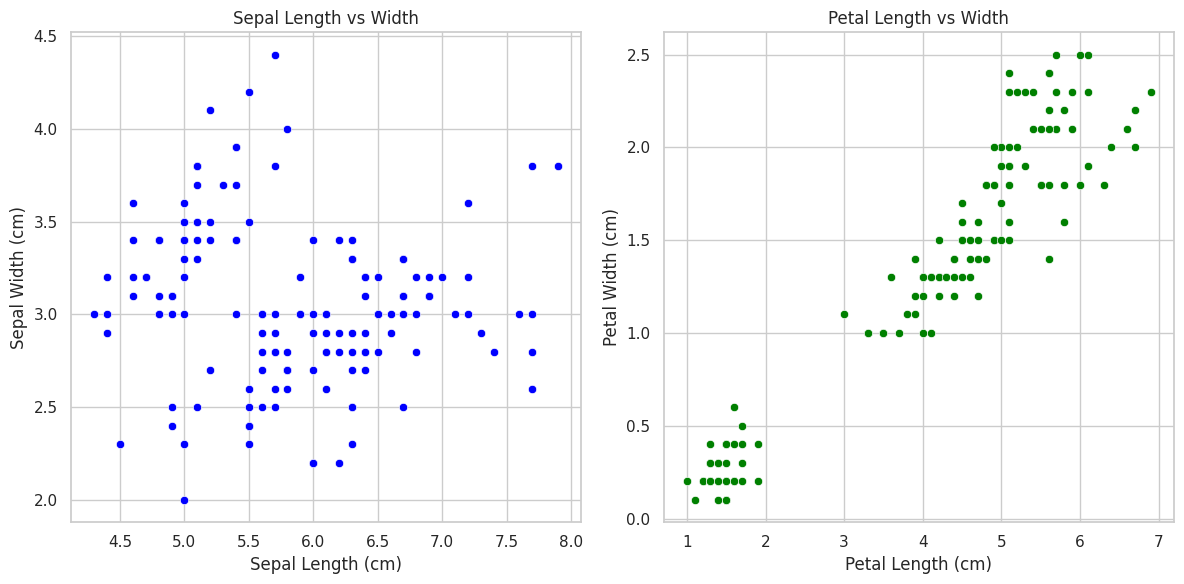

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

# Buat koneksi dengan SQLAlchemy
# Berikan parameter ssl sebagai dictionary untuk PyMySQL
db_url = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
# Tambahkan connect_args untuk parameter SSL
engine = create_engine(db_url, connect_args={'ssl': {'ssl': {}}})


# Ambil data
query = "SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM irissql;"
df = pd.read_sql(query, engine)

# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="sepalLengthCm", y="sepalWidthCm", color='blue')
plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="petalLengthCm", y="petalWidthCm", color='green')
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

## K-Means

6. Clustering dengan K = 2

In [ ]:
val_X = np.array([row[1:] for row in data_remove_class])
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

k_means_C2.fit(val_X)

labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

Initialization complete
Iteration 0, inertia 135.61999999999998.
Iteration 1, inertia 105.16576351752823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 216.54999999999995.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 159.73000000000002.
Iteration 1, inertia 106.33766372492286.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 144.86999999999998.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 199.2599999999999.
Iteration 1, inertia 107.14788485611595.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 160.12000000000003.
Iteration 1,

7. Visualisasi Hasil Clustering K = 2

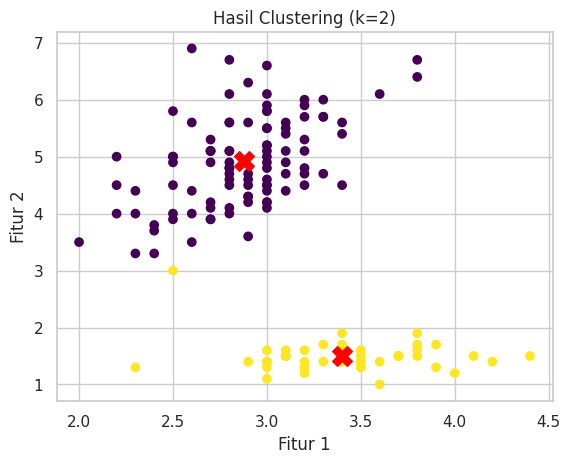

In [ ]:
plt.scatter(val_X[:, 0], val_X[:, 1], c=labelC2, cmap='viridis')
plt.scatter(centroidsC2[:, 0], centroidsC2[:, 1], c='red', marker='X', s=200)
plt.title("Hasil Clustering (k=2)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

8. Nilai Inertia Hasil Clustering K = 2

In [ ]:
val_X = df.values
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 2:", kmeans.inertia_)


Inertia dengan k = 2: 105.16576351752823


9. Silhouete Score dengan K =2

In [ ]:
val_X = np.array(df)

k_means = KMeans(n_clusters=2, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k=2: ", sil_score)


Silhouette Score untuk k=2:  0.7405544914557842


10. Clustering dengan K = 3

In [ ]:
val_X = np.array([row[1:] for row in data_remove_class])

k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C3.fit(val_X)

# Ambil hasil
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_


Initialization complete
Iteration 0, inertia 101.62999999999994.
Iteration 1, inertia 53.71228616780049.
Iteration 2, inertia 49.637470833333346.
Iteration 3, inertia 48.36391864506109.
Iteration 4, inertia 48.168714731262334.
Iteration 5, inertia 48.03795999999999.
Iteration 6, inertia 48.01326442577033.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 74.96999999999998.
Iteration 1, inertia 48.17967067102235.
Iteration 2, inertia 48.03795999999999.
Iteration 3, inertia 48.01326442577033.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 73.51999999999998.
Iteration 1, inertia 53.75499394383634.
Iteration 2, inertia 49.01050335439959.
Iteration 3, inertia 48.4406800962021.
Iteration 4, inertia 48.20424930555555.
Iteration 5, inertia 48.170190905332795.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 58.830000000000005.
Iteration 1, inertia 48.659167658964435.
I

11. Visualisasi Hasil Clustering K = 3

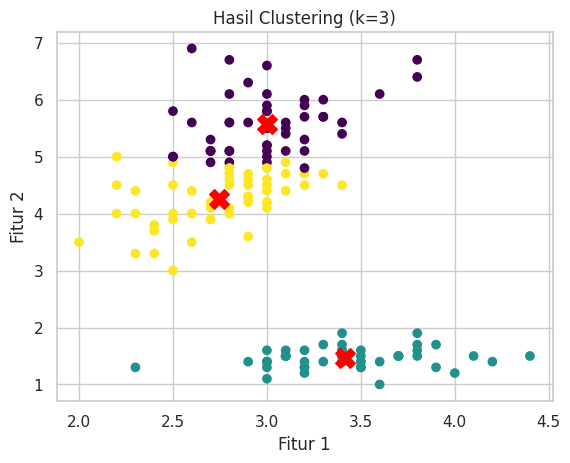

In [ ]:
plt.scatter(val_X[:, 0], val_X[:, 1], c=labelC3, cmap='viridis')
plt.scatter(centroidsC3[:, 0], centroidsC3[:, 1], c='red', marker='X', s=200)
plt.title("Hasil Clustering (k=3)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

12. Itung Inertia Hasil Clustering K = 3

In [ ]:
val_X = df.values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 3:", kmeans.inertia_)


Inertia dengan k = 3: 48.99365658263308


13. Silhouete Score dengan K = 3

In [ ]:
val_X = np.array(df)

k_means = KMeans(n_clusters=3, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 3: ", sil_score)


Silhouette Score untuk k = 3:  0.5934015210796922


14. Clustering dengan K = 4

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Asumsikan data_remove_class sudah tersedia dan tidak mengandung kolom class
val_X = np.array([row[1:] for row in data_remove_class])

# KMeans untuk k = 4
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C4.fit(val_X)

# Ambil hasil
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_


Initialization complete
Iteration 0, inertia 50.13.
Iteration 1, inertia 34.51888608441198.
Iteration 2, inertia 34.39441862706302.
Iteration 3, inertia 34.35062490842491.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 54.48999999999999.
Iteration 1, inertia 37.0637319741342.
Iteration 2, inertia 35.33608722668967.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 63.000000000000014.
Iteration 1, inertia 36.4527138269532.
Iteration 2, inertia 34.98067929577097.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Ini

15. Visualisasi Hasil CLustering K = 4

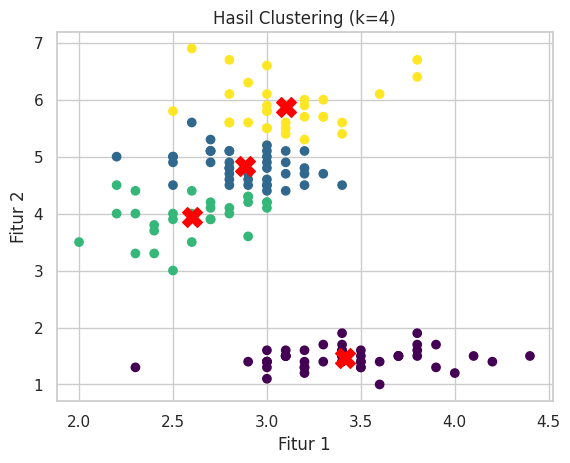

In [ ]:
plt.scatter(val_X[:, 0], val_X[:, 1], c=labelC4, cmap='viridis')
plt.scatter(centroidsC4[:, 0], centroidsC4[:, 1], c='red', marker='X', s=200)
plt.title("Hasil Clustering (k=4)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

16. Itung Inertia Hasil Clustering K = 4

In [ ]:
val_X = df.values
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 4:", kmeans.inertia_)


Inertia dengan k = 4: 57.44028021295475


17. Silhouette Score dengan K = 4

In [ ]:
val_X = np.array(df)

k_means = KMeans(n_clusters=4, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 4: ", sil_score)


Silhouette Score untuk k = 4:  0.4974115445023624


7. Visualisasi dari score siluet

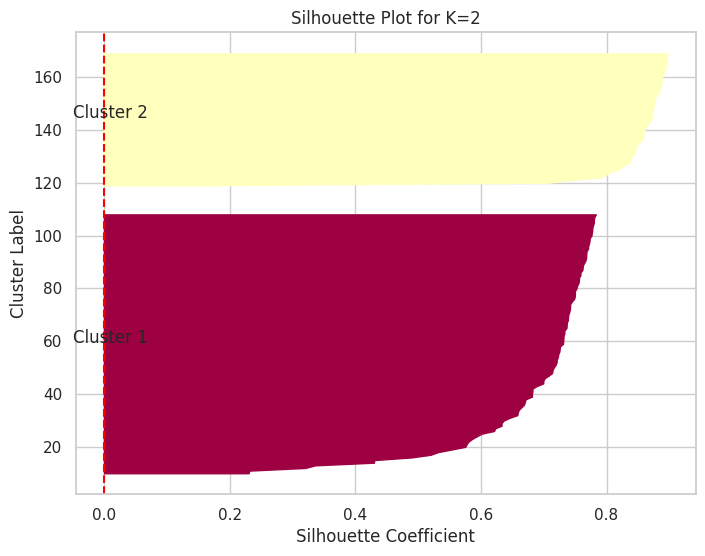

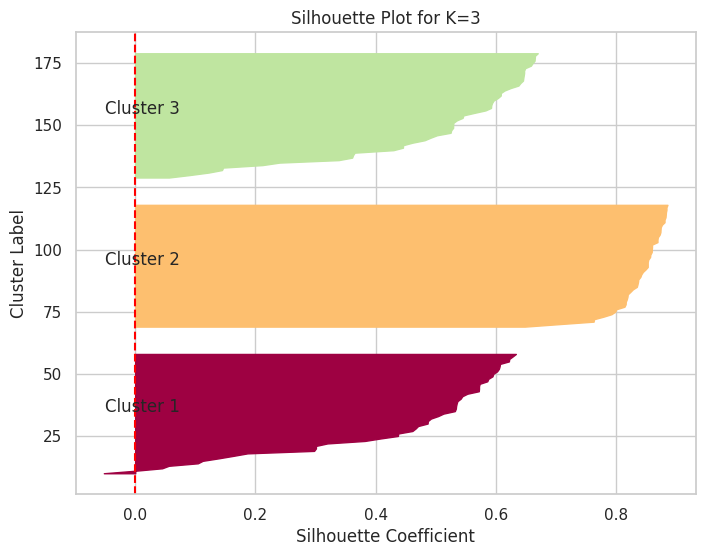

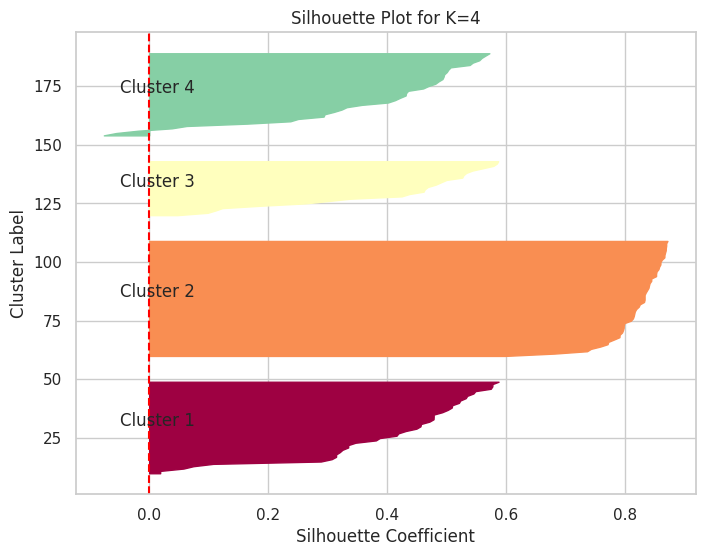

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data sudah ada di val_X (misalnya hasil normalisasi)

k_range = range(2, 5)  # Uji untuk K=2, K=3, K=4

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(val_X)

    silhouette_values = silhouette_samples(val_X, labels)

    # ---- Silhouette Plot untuk K Cluster ----
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / k)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', fontsize=12)

        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Plot for K={k}")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=0, color='red', linestyle='--')
    plt.show()


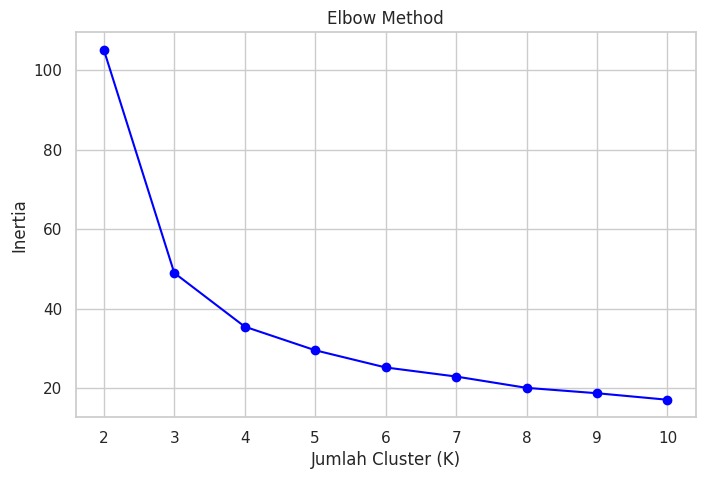

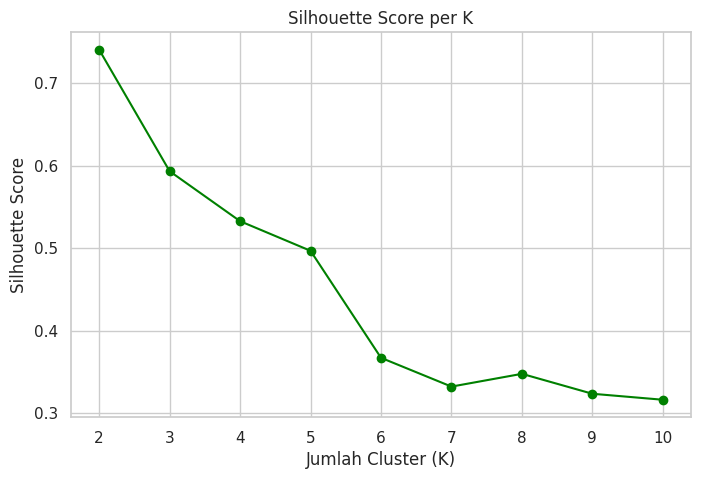


K dengan Silhouette Score terbaik adalah: K = 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan data sudah dalam variabel val_X (misalnya hasil normalisasi)
# Contoh: val_X = scaler.fit_transform(data) atau val_X = np.array(df)

k_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(val_X)

    inertia_values.append(kmeans.inertia_)  # untuk Elbow Method
    silhouette_scores.append(silhouette_score(val_X, labels))  # untuk Silhouette

# -------------------------
# Elbow Method Plot
# -------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_range)
plt.show()

# -------------------------
# Tampilkan K terbaik berdasarkan Silhouette Score tertinggi
# -------------------------
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK dengan Silhouette Score terbaik adalah: K = {optimal_k}")


## Fuzzy C-Means

1. Menghitung centroid dan update keanggotaan

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Untuk memuat data Iris dan labelnya

# --- 1. Persiapan Data Iris ---
# Memuat dataset Iris dan menormalisasinya.
print("--- Persiapan Data ---")
iris = load_iris()
X_original = iris.data # Data Iris asli (fitur)
y_true = iris.target   # Label sebenarnya (ground truth)
                       # 0: Setosa, 1: Versicolor, 2: Virginica

# Normalisasi Data: Penting untuk FCM agar fitur memiliki skala yang seragam.
scaler = StandardScaler()
X = scaler.fit_transform(X_original) # X adalah data yang sudah dinormalisasi, akan jadi input FCM

print("Data Iris asli (5 baris pertama):\n", tabulate(pd.DataFrame(X_original[:5]), headers="keys", tablefmt="psql"))
print("\nLabel Asli (5 data pertama):", y_true[:5])
print("\nData Iris setelah normalisasi (5 baris pertama):\n", tabulate(pd.DataFrame(X[:5]), headers="keys", tablefmt="psql"))
print(f"\nBentuk data input (X): {X.shape}\n")
print(f"Bentuk label asli (y_true): {y_true.shape}\n")


# --- 2. Parameter FCM ---
NUM_CLUSTERS = 3       # Jumlah cluster yang diinginkan (C)
FUZZINESS_PARAM = 2.0  # Parameter fuzziness (m). m > 1, umumnya 2.0.

CONVERGENCE_TOLERANCE = 1e-4 # Toleransi konvergensi (epsilon)
MAX_ITERATIONS = 100       # Batas iterasi maksimum

print("===== PARAMETER FCM =====")
print(f"Jumlah Cluster: {NUM_CLUSTERS}")
print(f"Parameter Fuzziness (m): {FUZZINESS_PARAM}")
print(f"Toleransi Konvergensi: {CONVERGENCE_TOLERANCE}")
print(f"Maksimum Iterasi: {MAX_ITERATIONS}\n")

# --- 3. Fungsi-fungsi Inti Fuzzy C-Means (FCM) ---

def initialize_membership_matrix(data, num_clusters_val):
    """
    Menginisialisasi matriks keanggotaan (U) secara acak.
    """
    np.random.seed(42) # Untuk hasil yang konsisten
    num_data_points = len(data)
    U_initial = np.random.rand(num_data_points, num_clusters_val)
    U_normalized = U_initial / np.sum(U_initial, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan Awal (U) diinisialisasi.")
    return U_normalized

def calculate_centroids(data, U_matrix, fuzziness_param_val):
    """
    Menghitung pusat setiap cluster (centroid) berdasarkan matriks keanggotaan saat ini.
    """
    num_data_points = len(data)
    num_dimensions = data.shape[1]
    num_clusters_val = U_matrix.shape[1]
    centroids = np.zeros((num_clusters_val, num_dimensions))

    for j in range(num_clusters_val):
        u_ij_pow_m = U_matrix[:, j] ** fuzziness_param_val
        numerator_sum = np.sum(u_ij_pow_m[:, np.newaxis] * data, axis=0)
        denominator_sum = np.sum(u_ij_pow_m)

        if denominator_sum == 0:
            centroids[j] = np.zeros(num_dimensions)
        else:
            centroids[j] = numerator_sum / denominator_sum

    print("  -> Centroid dihitung.")
    return centroids

def update_membership_matrix(data, centroids_matrix, fuzziness_param_val):
    """
    Memperbarui matriks keanggotaan (U) berdasarkan centroid yang baru.
    """
    num_data_points = len(data)
    num_clusters_val = centroids_matrix.shape[0]
    U_new = np.zeros((num_data_points, num_clusters_val))
    exponent = 2 / (fuzziness_param_val - 1)

    for i in range(num_data_points):
        for j in range(num_clusters_val):
            distance_to_cj = np.linalg.norm(data[i] - centroids_matrix[j])

            if distance_to_cj == 0:
                U_new[i, j] = 1.0
                break

            denominator_sum_k = 0.0
            for k in range(num_clusters_val):
                distance_to_ck = np.linalg.norm(data[i] - centroids_matrix[k])
                if distance_to_ck == 0:
                    distance_to_ck = np.finfo(float).eps

                ratio_power = (distance_to_cj / distance_to_ck) ** exponent
                denominator_sum_k += ratio_power

            if denominator_sum_k == 0:
                U_new[i, j] = 1.0 / num_clusters_val
            else:
                U_new[i, j] = 1.0 / denominator_sum_k

    U_normalized = U_new / np.sum(U_new, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan (U) diperbarui.")
    return U_normalized

def check_convergence(old_centroids, new_centroids, tolerance):
    """
    Memeriksa konvergensi algoritma dengan menghitung total perubahan
    antara centroid lama dan centroid baru.
    """
    total_delta = 0.0
    for j in range(old_centroids.shape[0]):
        total_delta += np.linalg.norm(old_centroids[j] - new_centroids[j])

    print(f"  -> Perubahan centroid: {total_delta:.8f}")
    return total_delta < tolerance, total_delta

# --- 4. Alur Utama Algoritma Fuzzy C-Means ---
print("==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================\n")

U_current = initialize_membership_matrix(X, NUM_CLUSTERS)
print(f"Matriks Keanggotaan Awal (5 baris pertama):\n{U_current[:5, :]}\n")

iteration = 0
centroids_old = None
has_converged = False
last_delta = float('inf')

while iteration < MAX_ITERATIONS and not has_converged:
    iteration += 1
    print(f"\n===== ITERASI {iteration} =====")

    centroids_new = calculate_centroids(X, U_current, FUZZINESS_PARAM)
    print(f"\nCentroid setelah Iterasi {iteration}:\n{centroids_new}\n")

    if iteration > 1:
        has_converged, last_delta = check_convergence(centroids_old, centroids_new, CONVERGENCE_TOLERANCE)
        if has_converged:
            print("\n>>> **KONVERGENSI TERCAPAI!** Perubahan centroid di bawah toleransi.")
            break

    centroids_old = centroids_new
    U_current = update_membership_matrix(X, centroids_new, FUZZINESS_PARAM)

    if U_current.shape[0] > 10:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration} (5 baris pertama):\n{U_current[:5, :]}\n")
    else:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration}:\n{U_current}\n")

# --- 5. Hasil Akhir Clustering Fuzzy C-Means ---
print("\n==================== HASIL AKHIR CLUSTERING FUZZY C-MEANS ====================")
print(f"Jumlah Iterasi yang Berjalan: {iteration}")
print(f"Toleransi Konvergensi Epsilon: {CONVERGENCE_TOLERANCE}")
print(f"Perubahan Centroid Terakhir: {last_delta:.8f}")
print(f"\nCentroid Akhir:\n{centroids_new}")
print(f"\nMatriks Keanggotaan Akhir (U) (5 baris pertama):\n{U_current[:5, :]}")

# --- Interpretasi Hasil (Hard Assignment - Opsional) ---
# Untuk visualisasi atau pemahaman yang lebih mudah, kita bisa "mengubah" hasil fuzzy
# menjadi penugasan cluster yang "keras" (hard assignment).
print("\n--- Penugasan Cluster (Hard Assignment - Untuk Interpretasi) ---")
cluster_assignment = np.argmax(U_current, axis=1) # Mengambil indeks kolom dengan nilai tertinggi di setiap baris

# Tampilkan penugasan untuk beberapa data poin
for i in range(min(10, len(X))): # Tampilkan 10 data poin pertama
    # Menampilkan data asli dan normalisasi untuk perbandingan
    print(f"Data Asli ke-{i+1} ({X_original[i]}) -> Normalisasi ({X[i].round(2)}) -> Paling condong ke Cluster {cluster_assignment[i] + 1}")


# --- 6. Menghitung Akurasi Clustering (OUTPUT SESUAI PERMINTAAN) ---
print("\n==================== MENGHITUNG AKURASI CLUSTERING ====================")

# Langkah 1: Dapatkan hasil hard assignment (cluster yang diprediksi)
predicted_clusters = cluster_assignment

# Langkah 2: Lakukan pemetaan cluster ke label asli (ground truth)
cluster_to_label_map = {}
cluster_labels_collections = [[] for _ in range(NUM_CLUSTERS)]

for i in range(len(predicted_clusters)):
    cluster_id = predicted_clusters[i]
    true_label = y_true[i]
    cluster_labels_collections[cluster_id].append(true_label)

for cluster_id in range(NUM_CLUSTERS):
    labels_in_cluster = np.array(cluster_labels_collections[cluster_id])
    if len(labels_in_cluster) == 0:
        cluster_to_label_map[cluster_id] = -1
        continue

    counts = np.bincount(labels_in_cluster)
    most_common_label = np.argmax(counts)
    cluster_to_label_map[cluster_id] = most_common_label

# Langkah 3: Terapkan pemetaan dan hitung akurasi
correct_predictions = 0
for i in range(len(predicted_clusters)):
    predicted_cluster_id = predicted_clusters[i]
    true_label = y_true[i]

    mapped_predicted_label = cluster_to_label_map.get(predicted_cluster_id, -1)

    if mapped_predicted_label == true_label:
        correct_predictions += 1

total_data_points = len(X)
accuracy = correct_predictions / total_data_points

# --- Output Akurasi Sesuai Format yang Diminta ---
print(f"Total Data Poin: {total_data_points}")
print(f"Prediksi Benar: {correct_predictions}")
print(f"Akurasi Clustering: {accuracy * 100:.2f}%")

print("\nFCM dan Evaluasi Akurasi Selesai!")

--- Persiapan Data ---
Data Iris asli (5 baris pertama):
 +----+-----+-----+-----+-----+
|    |   0 |   1 |   2 |   3 |
|----+-----+-----+-----+-----|
|  0 | 5.1 | 3.5 | 1.4 | 0.2 |
|  1 | 4.9 | 3   | 1.4 | 0.2 |
|  2 | 4.7 | 3.2 | 1.3 | 0.2 |
|  3 | 4.6 | 3.1 | 1.5 | 0.2 |
|  4 | 5   | 3.6 | 1.4 | 0.2 |
+----+-----+-----+-----+-----+

Label Asli (5 data pertama): [0 0 0 0 0]

Data Iris setelah normalisasi (5 baris pertama):
 +----+-----------+------------+----------+----------+
|    |         0 |          1 |        2 |        3 |
|----+-----------+------------+----------+----------|
|  0 | -0.900681 |  1.019     | -1.34023 | -1.31544 |
|  1 | -1.14302  | -0.131979  | -1.34023 | -1.31544 |
|  2 | -1.38535  |  0.328414  | -1.39706 | -1.31544 |
|  3 | -1.50652  |  0.0982173 | -1.28339 | -1.31544 |
|  4 | -1.02185  |  1.2492    | -1.34023 | -1.31544 |
+----+-----------+------------+----------+----------+

Bentuk data input (X): (150, 4)

Bentuk label asli (y_true): (150,)

===== PARAMETE

2. Menghitung silhouete score

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

print("\n==================== SILHOUETTE SCORE DAN VISUALISASI ====================")

# 1. Hitung Silhouette Score dari hasil hard assignment
sil_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score (rata-rata): {sil_score:.4f}")

# 2. Hitung semua nilai silhouette untuk masing-masing sample
sample_silhouette_values = silhouette_samples(X, predicted_clusters)


==================== SILHOUETTE SCORE DAN VISUALISASI ====================
Silhouette Score (rata-rata): 0.4584
